##### 製作圖表動畫
這篇文章會介紹 matplotlib 的 animation 模組，使用模組中的 FuncAnimation() 方法製作圖表動畫，\
文章中會製作散點圖 ( 散布圖 ) 以及正弦波 ( sin 波 ) 折線圖的動畫圖表。

##### import matplotlib 
要進行本篇的範例，必須先載入 matplotlib 函式庫的 pyplot 模組，範例將其獨立命名為 plt，因為要做動畫，所以額外載入 animation 模組。

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

##### 使用 FuncAnimation() 
FuncAnimation() 方法可以將可迭代的資料，提供給指定的函式執行繪圖動作，繪圖的函式執行完成後，會產生一個動畫的物件，\
只要再透過 save 的方法，就能將該物件儲存為 gif 動畫或 mp4 影片，使用方法如下：

In [ ]:
ani = animation.FuncAnimation(fig, func, frames, interval, init_func, repeat)

相關參數介紹：

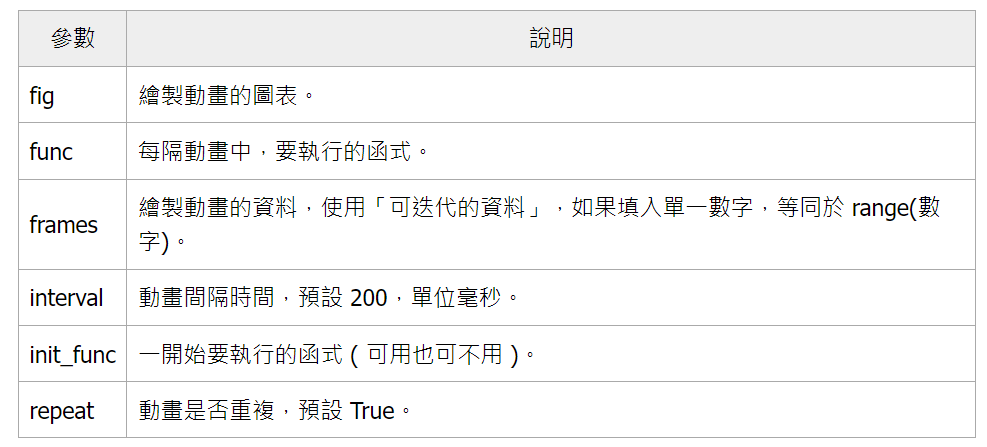

##### 基本散點圖動畫 
下方的程式碼執行，會先產生一個 x 軸和 y 軸範圍是 0～10 的圖表，接著定義 init 函式作為動畫開始的函式，\
以及定義 run 函式作為每格動畫要執行的函式，函式內容使用 scatter 方法，在特定座標位置畫上一點，\
最後執行 animation.FuncAnimation 製作動畫，資料直接設定 frames 參數為 10 ( 等同提供 range(10) 的資料 )，\
完成後就會將圖表動畫儲存為 animation.gif。

如果要使用 Colab 儲存圖表動畫，必須先連動 Colab 和雲端硬碟。

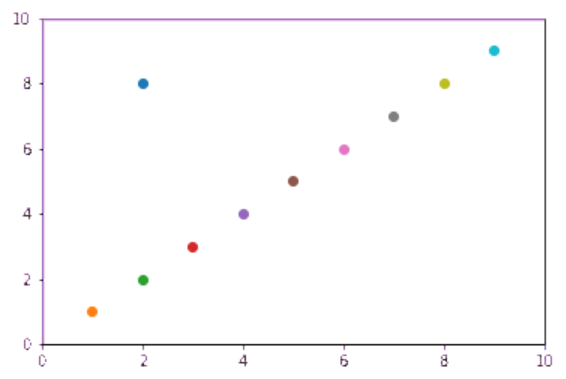

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()  # 建立單一圖表
ax.set_xlim(0,10)         # 設定 x 軸範圍 0～10
ax.set_ylim(0,10)         # 設定 y 軸範圍 0～10

def init():
    ax.scatter(2, 8)      # 一開始要執行的韓式，在 (2,8) 的位置畫點

def run(data):
    if data>0:
        ax.scatter(data, data)    # 如果資料大於 0，就在圖表上畫點
    else:
        pass

ani = animation.FuncAnimation(fig, run, frames=10, interval=10, init_func=init)  # 製作動畫
ani.save('animation.gif', fps=10)   # 儲存為 gif
plt.show()

下方的程式碼，使用 random 函式庫產生 30 個 1～50 的隨機座標點，並搭配簡單的數學運算，\
產生一張座標點會不斷落下的動畫圖表 ( 搭配 clear() 方法，每次函式執行時將圖表清空 )。

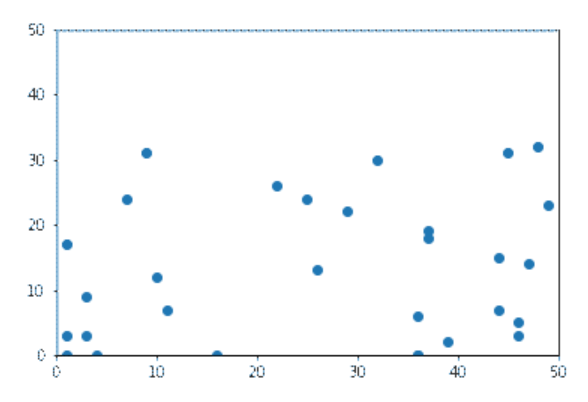

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()
ax.set_xlim(0,50)       # x 座標範圍設定 0～50
ax.set_ylim(0,50)       # y 座標範圍設定 0～50

x = random.choices(range(1, 50),k=30)   # 隨機 30 個 1～50 的 x 座標
y = random.choices(range(1, 50),k=30)   # 隨機 30 個 1～50 的 y 座標

def init():
    ax.scatter(x, y)

def run(data):
    ax.clear()              # 清空圖表
    ax.set_xlim(0,50)       # x 座標範圍設定 0～50 ( 避免圖表自動調整 )
    ax.set_ylim(0,50)       # x 座標範圍設定 0～50
    for i, e in enumerate(y):
        if e>0:
            y[i] = e - 1    # 將 y 的數值不斷減少 1，直到為 0
    ax.scatter(x, y)

ani = animation.FuncAnimation(fig, run, frames=30, interval=10, init_func=init)
ani.save('animation.gif', fps=10)
plt.show()

##### 正弦波 ( sin 波 ) 折線圖動畫 
下方的程式碼使用 line 變數宣告為折線圖物件，每次函式執行時，使用 set_data 方法重新提供這個物件資料，就可以畫出正弦波的折線圖動畫。

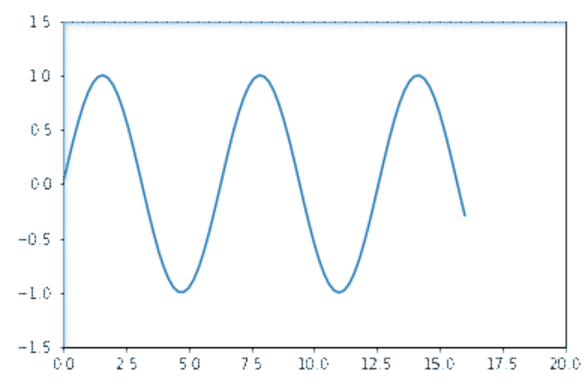

In [ ]:
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()       # 建立單一圖表
ax.set_xlim(0,20)              # x 座標範圍設定 0～20
ax.set_ylim(-1.5,1.5)          # y 座標範圍設定 -1.5～1.5

n = [i/5 for i in range(100)]  # 使用串列升成式產生 0～20 共 100 筆資料
x, y = [], []                  # 設定 x 和 y 變數為空串列
line, = ax.plot(x, y)          # 定義 line 變數為折線圖物件 ( 注意 line 後方有逗號 )

def run(data):
    x.append(data)             # 添加 x 資料點
    y.append(math.sin(data))   # 添加 y 資料點
    line.set_data(x, y)        # 重新設定資料點

ani = animation.FuncAnimation(fig, run, frames=n, interval=30)
ani.save('animation.gif', fps=30)
plt.show()